In [12]:
# HEART DISEASE PREDICTION

In [13]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
%pip install pandas seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [16]:
heart_df = pd.read_csv("heart.csv")
# data = pd.read_csv("heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [17]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [18]:
heart_df.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [20]:
heart_df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [21]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

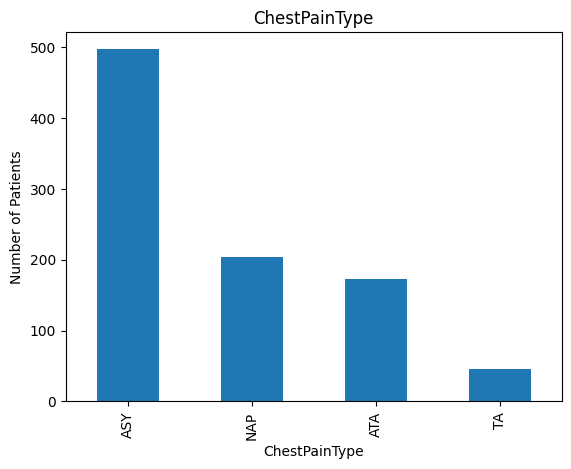

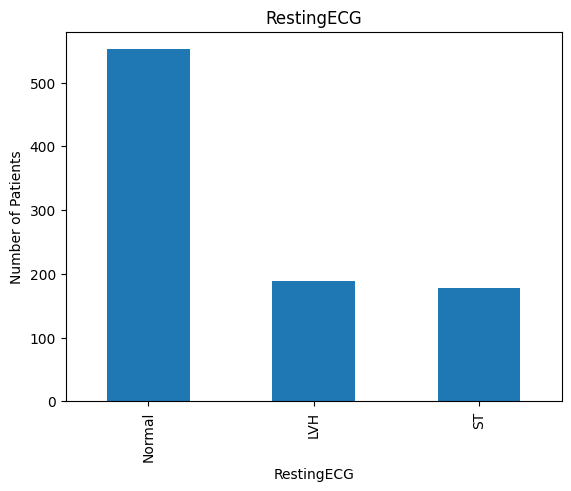

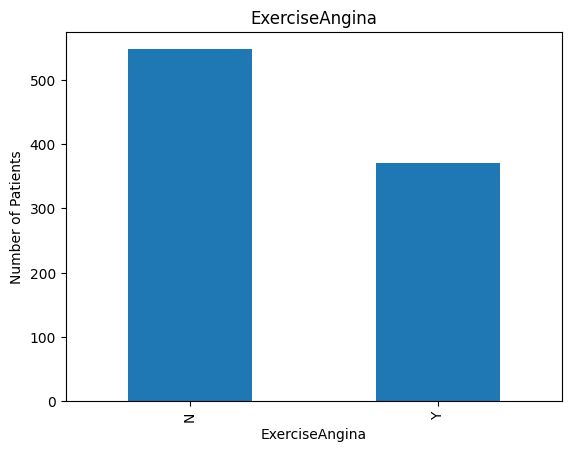

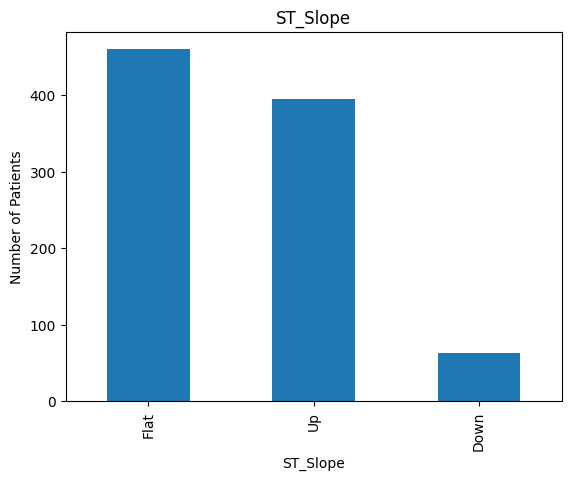

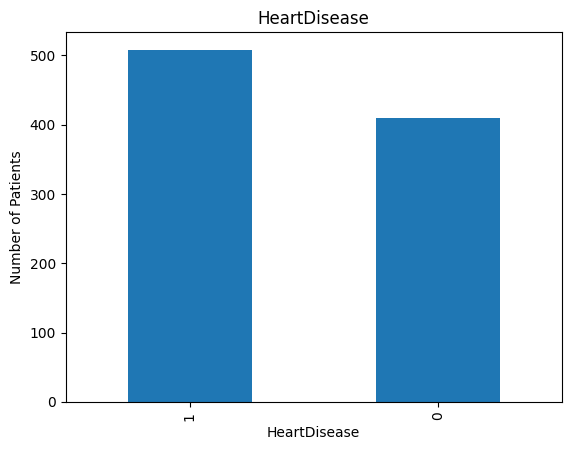

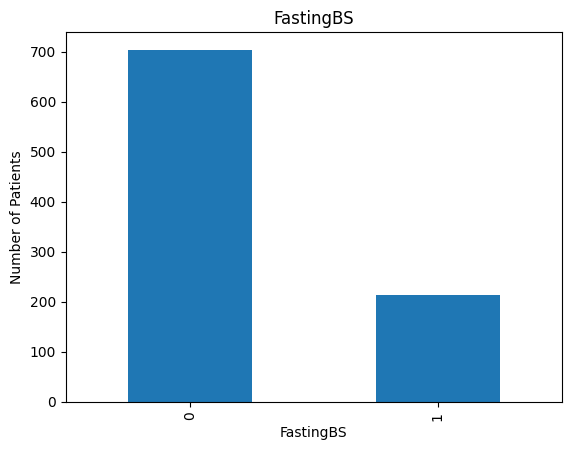

In [22]:
cartegorical_columns = ["ChestPainType","RestingECG","ExerciseAngina","ST_Slope","HeartDisease","FastingBS"]
for column in cartegorical_columns:
    plt.figure()
    heart_df[column].value_counts().plot(kind='bar')
   
    plt.xlabel(column)
    plt.ylabel("Number of Patients")
    plt.title(f"{column}")
plt.show()


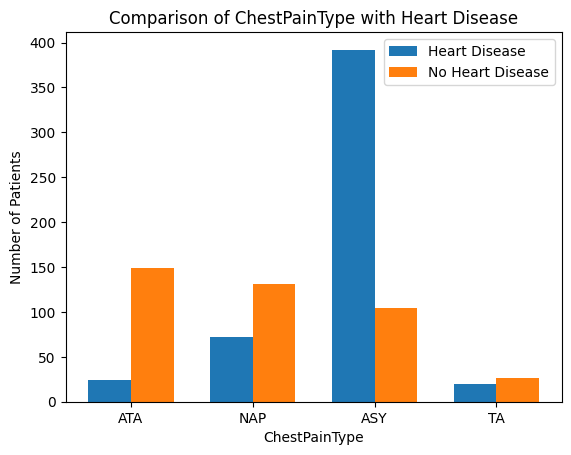

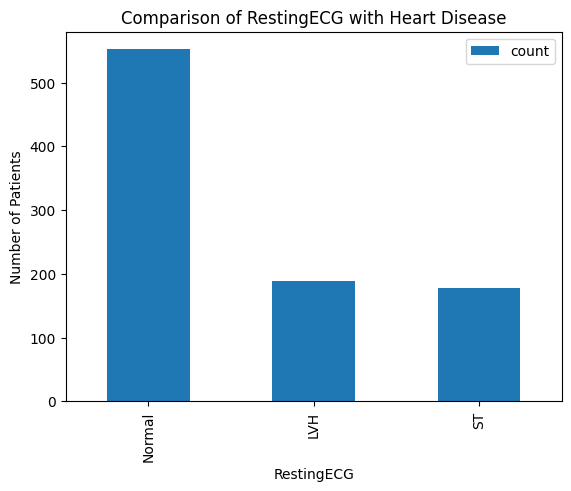

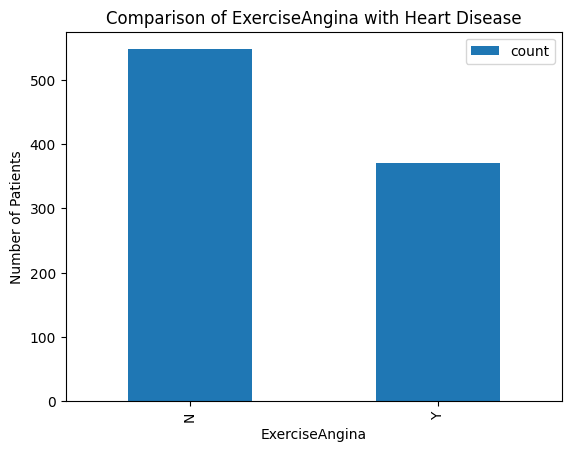

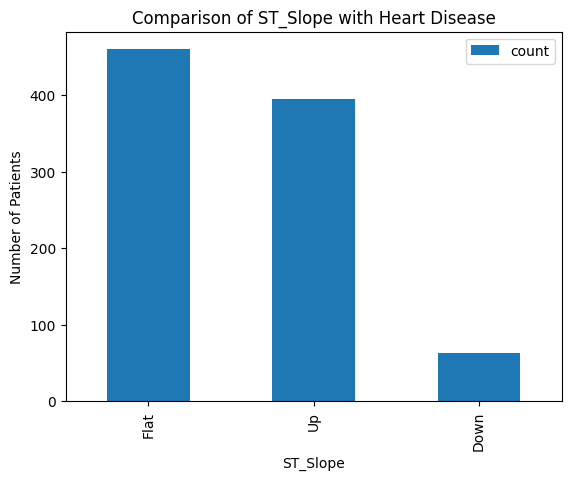

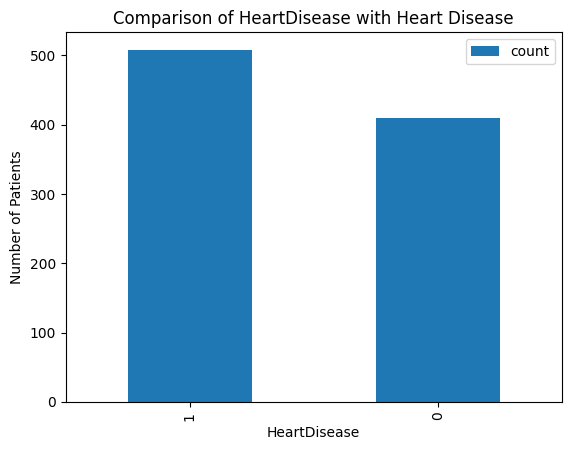

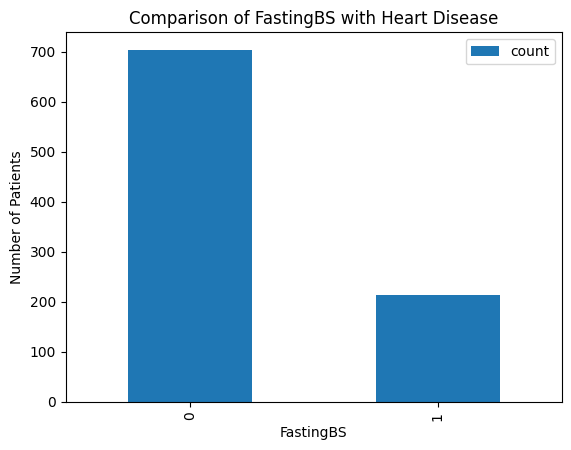

In [23]:
categorical_columns = ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease", "FastingBS"]

for column in categorical_columns:
    plt.figure()
    if column == "ChestPainType":
        # Filter the data for patients with and without heart disease
        chestpain_heart_disease = heart_df[heart_df["HeartDisease"] == 1][column].value_counts()
        chestpain_no_heart_disease = heart_df[heart_df["HeartDisease"] == 0][column].value_counts()

        # Get the unique ST slope values
        chestpain_values = heart_df[column].unique()

        # Get the counts for patients with heart disease and without heart disease
        y_heart_disease = [chestpain_heart_disease.get(slope, 0) for slope in chestpain_values]
        y_no_heart_disease = [chestpain_no_heart_disease.get(slope, 0) for slope in chestpain_values]

        # Create the x-axis positions for the bars
        x = range(len(chestpain_values))

        # Plotting the bar chart for ST_Slope
        width = 0.35
        plt.bar(x, y_heart_disease, width, label="Heart Disease")
        plt.bar([val + width for val in x], y_no_heart_disease, width, label="No Heart Disease")

        # Set the x-axis ticks and labels
        plt.xticks([val + width/2 for val in x], chestpain_values)

    else:
        # Plotting the bar chart for other columns
        heart_df[column].value_counts().plot(kind='bar')

    plt.xlabel(column)
    plt.ylabel("Number of Patients")
    plt.title(f"Comparison of {column} with Heart Disease")
    plt.legend()
    plt.show()

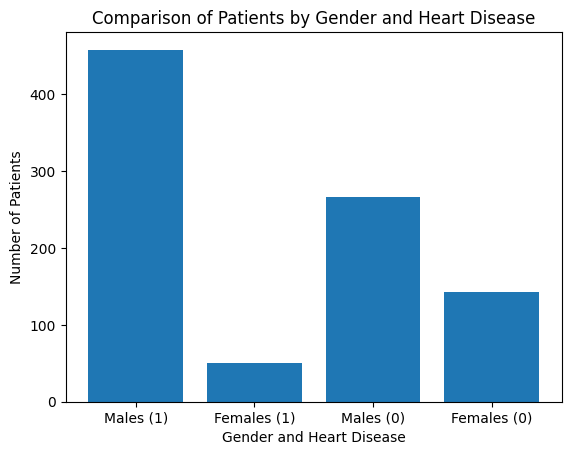

In [24]:


gender_columns = ["Sex"]
heart_disease_columns = ["HeartDisease"]

for gender_column in gender_columns:
    for heart_disease_column in heart_disease_columns:
        plt.figure()
        
        # Filter the data for males with and without heart disease
        males_with_heart_disease = heart_df[(heart_df[gender_column] == "M") & (heart_df[heart_disease_column] == 1)]
        males_no_heart_disease = heart_df[(heart_df[gender_column] == "M") & (heart_df[heart_disease_column] == 0)]
        
        # Filter the data for females with and without heart disease
        females_with_heart_disease = heart_df[(heart_df[gender_column] == "F") & (heart_df[heart_disease_column] == 1)]
        females_no_heart_disease = heart_df[(heart_df[gender_column] == "F") & (heart_df[heart_disease_column] == 0)]
        
        # Count the number of males and females with and without heart disease
        counts = [
            len(males_with_heart_disease), len(females_with_heart_disease),
            len(males_no_heart_disease), len(females_no_heart_disease)
        ]
        
        # Labels for the x-axis
        labels = ['Males (1)', 'Females (1)', 'Males (0)', 'Females (0)']
        
        # Plotting the bar chart
        plt.bar(labels, counts)
        
        plt.xlabel('Gender and Heart Disease')
        plt.ylabel('Number of Patients')
        plt.title(f"Comparison of Patients by Gender and Heart Disease")
        plt.show()


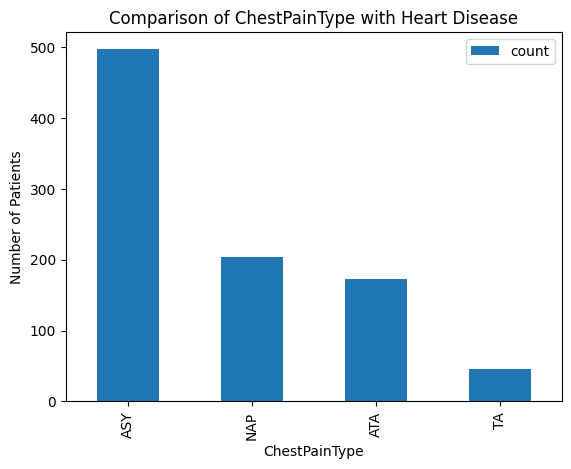

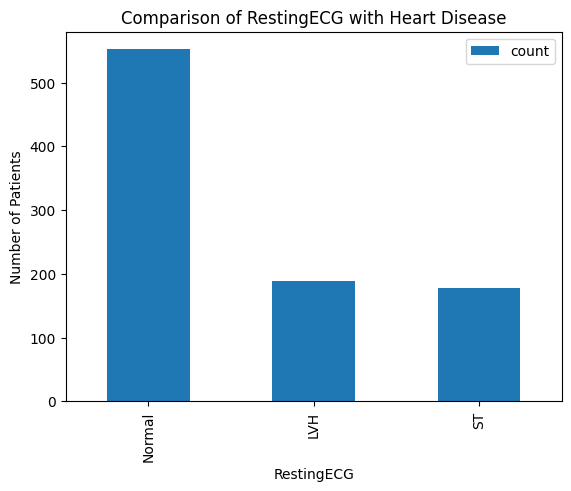

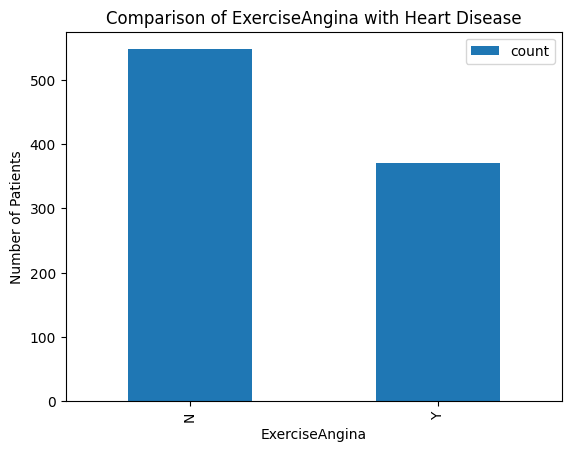

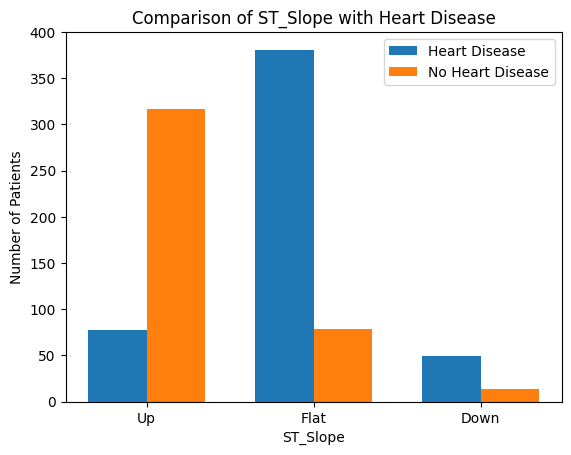

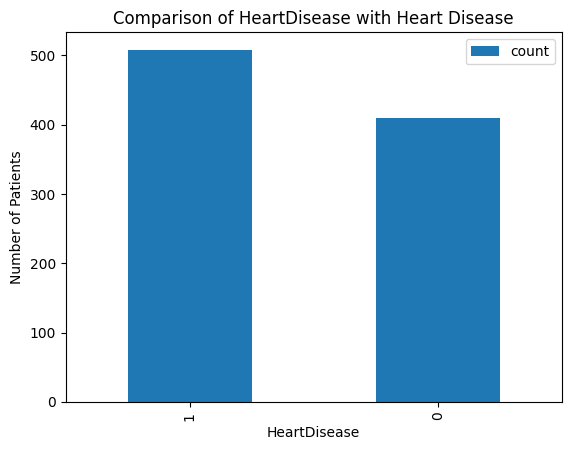

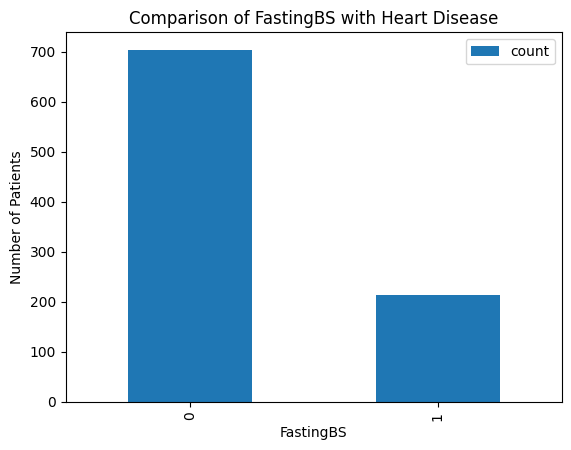

In [25]:
categorical_columns = ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease", "FastingBS"]

for column in categorical_columns:
    plt.figure()
    if column == "ST_Slope":
        # Filter the data for patients with and without heart disease
        st_slope_heart_disease = heart_df[heart_df["HeartDisease"] == 1][column].value_counts()
        st_slope_no_heart_disease = heart_df[heart_df["HeartDisease"] == 0][column].value_counts()

        # Get the unique ST slope values
        st_slope_values = heart_df[column].unique()

        # Get the counts for patients with heart disease and without heart disease
        y_heart_disease = [st_slope_heart_disease.get(slope, 0) for slope in st_slope_values]
        y_no_heart_disease = [st_slope_no_heart_disease.get(slope, 0) for slope in st_slope_values]

        # Create the x-axis positions for the bars
        x = range(len(st_slope_values))

        # Plotting the bar chart for ST_Slope
        width = 0.35
        plt.bar(x, y_heart_disease, width, label="Heart Disease")
        plt.bar([val + width for val in x], y_no_heart_disease, width, label="No Heart Disease")

        # Set the x-axis ticks and labels
        plt.xticks([val + width/2 for val in x], st_slope_values)

    else:
        # Plotting the bar chart for other columns
        heart_df[column].value_counts().plot(kind='bar')

    plt.xlabel(column)
    plt.ylabel("Number of Patients")
    plt.title(f"Comparison of {column} with Heart Disease")
    plt.legend()
    plt.show()

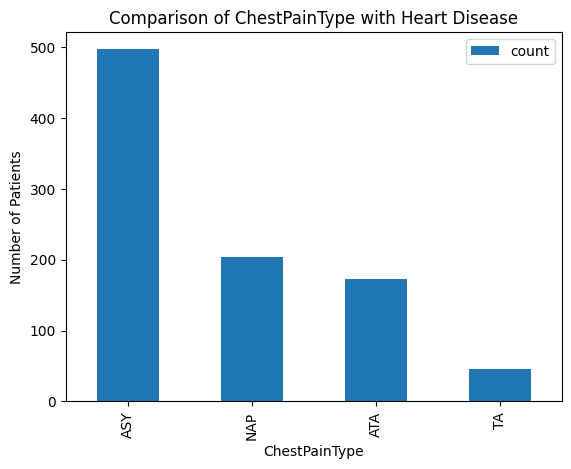

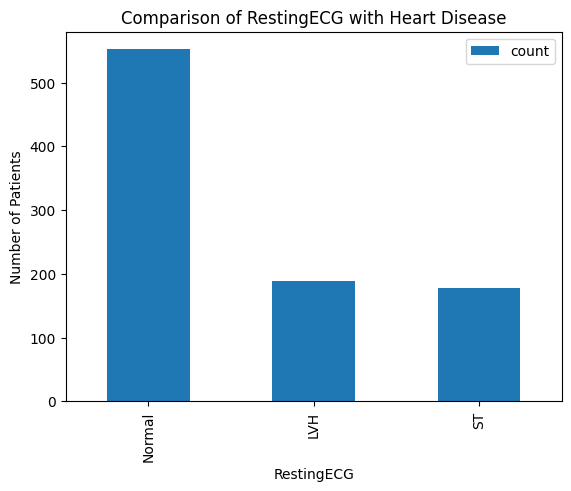

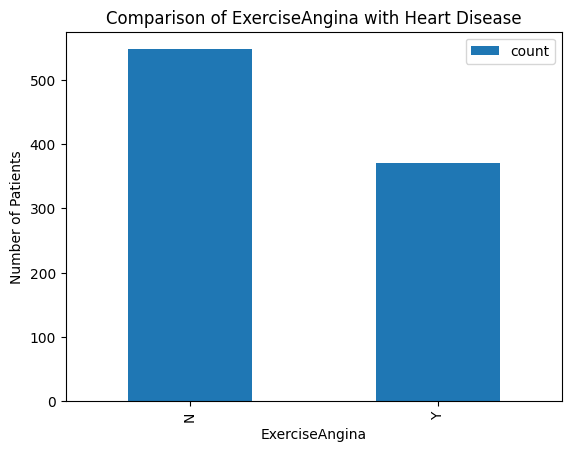

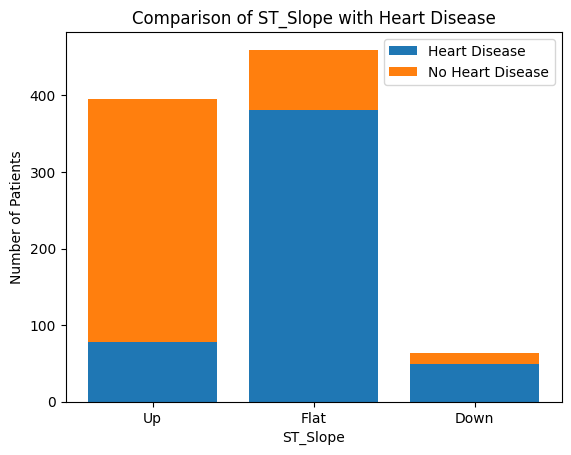

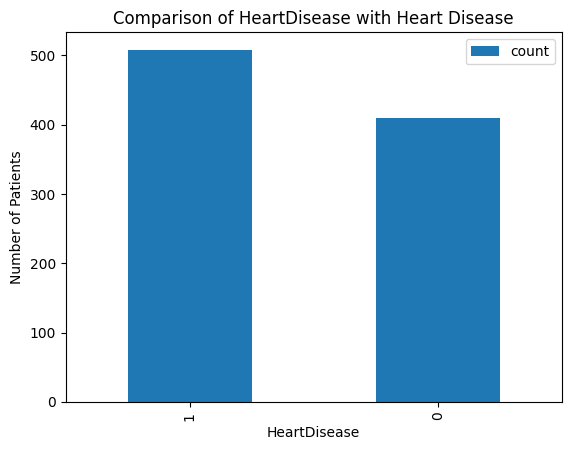

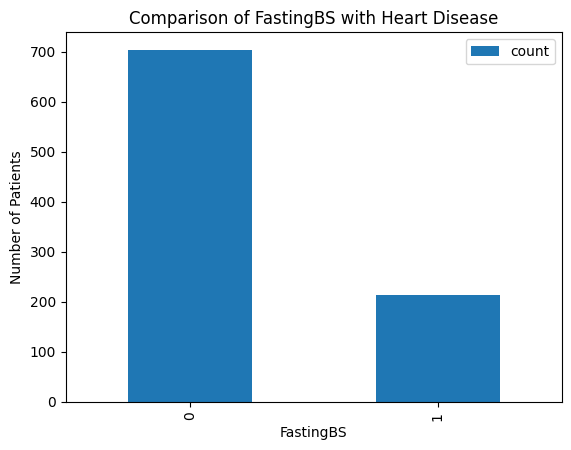

In [26]:
categorical_columns = ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease", "FastingBS"]

for column in categorical_columns:
    plt.figure()
    if column == "ST_Slope":
        # Filter the data for patients with and without heart disease
        st_slope_heart_disease = heart_df.loc[heart_df["HeartDisease"] == 1, column].value_counts()
        st_slope_no_heart_disease = heart_df.loc[heart_df["HeartDisease"] == 0, column].value_counts()

        # Create a list of all possible ST slope values
        st_slope_values = ["Up", "Flat", "Down"]

        # Create a list of counts for each ST slope value for patients with heart disease
        y_heart_disease = [st_slope_heart_disease.get(slope, 0) for slope in st_slope_values]

        # Create a list of counts for each ST slope value for patients without heart disease
        y_no_heart_disease = [st_slope_no_heart_disease.get(slope, 0) for slope in st_slope_values]

        # Plotting the bar chart for ST_Slope
        plt.bar(st_slope_values, y_heart_disease, label="Heart Disease")
        plt.bar(st_slope_values, y_no_heart_disease, label="No Heart Disease", bottom=y_heart_disease)
    else:
        # Plotting the bar chart for other columns
        heart_df[column].value_counts().plot(kind='bar')

    plt.xlabel(column)
    plt.ylabel("Number of Patients")
    plt.title(f"Comparison of {column} with Heart Disease")
    plt.legend()
    plt.show()

In [27]:
count = (heart_df['RestingBP'] == 0).sum()
count


1

In [28]:
count = (heart_df['Cholesterol'] == 0).sum()
count

172

In [29]:
heart_df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [30]:
# Calculate the median RestingBP value for each HeartDisease category
restingbp_median_by_heartdisease = heart_df.groupby('HeartDisease')['RestingBP'].median()

# Replace RestingBP values of 0 with the corresponding median value based on HeartDisease
heart_df.loc[heart_df['RestingBP'] == 0, 'RestingBP'] = heart_df.loc[heart_df['RestingBP'] == 0, 'HeartDisease'].map(restingbp_median_by_heartdisease)

# Calculate the median Cholesterol value for each HeartDisease category
cholesterol_median_by_heartdisease = heart_df.groupby('HeartDisease')['Cholesterol'].median()

# Replace Cholesterol values of 0 with the corresponding median value based on HeartDisease
heart_df.loc[heart_df['Cholesterol'] == 0, 'Cholesterol'] = heart_df.loc[heart_df['Cholesterol'] == 0, 'HeartDisease'].map(cholesterol_median_by_heartdisease)


In [31]:
count = (heart_df['Cholesterol'] == 0).sum()
count

0

In [32]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540305,239.675381,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989941,54.328249,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [33]:
categorical_columns = ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS"]

# Convert categorical columns into dummy variables
heart_df_dummies = pd.get_dummies(heart_df, columns=categorical_columns, drop_first=True)

# Display the updated DataFrame with dummy variables
print(heart_df_dummies.head())


   Age Sex  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  \
0   40   M        140          289    172      0.0             0   
1   49   F        160          180    156      1.0             1   
2   37   M        130          283     98      0.0             0   
3   48   F        138          214    108      1.5             1   
4   54   M        150          195    122      0.0             0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0               True              False             False               True   
1              False               True             False               True   
2               True              False             False              False   
3              False              False             False               True   
4              False               True             False               True   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  FastingBS_1  
0          False             Fal

In [38]:
%pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 44.0/44.0 MB 1.4 MB/s eta 0:00:00


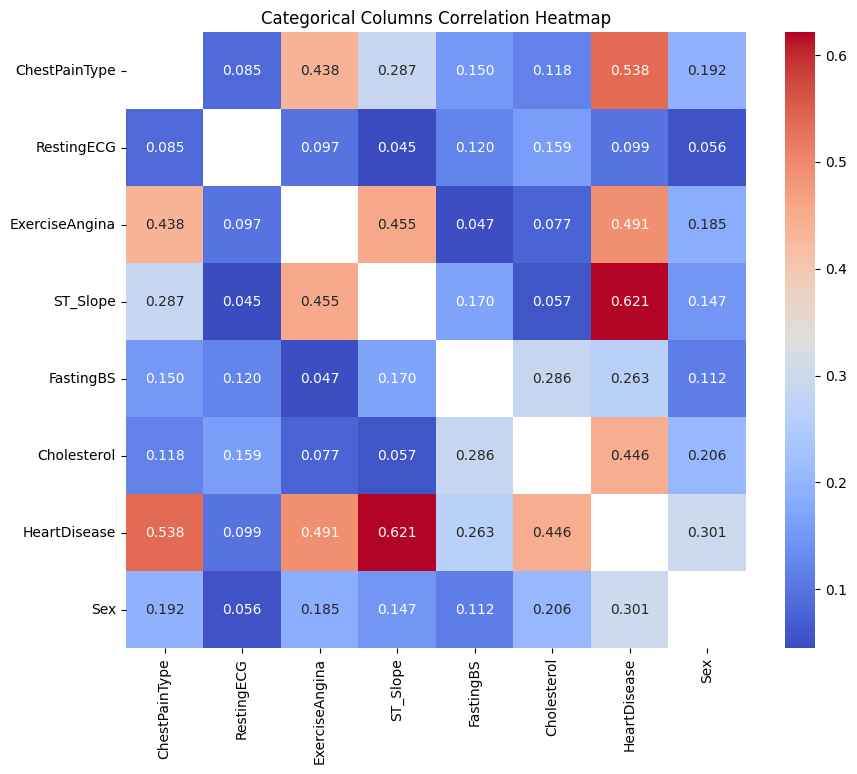

In [39]:
from scipy import stats
import scipy.stats

# Select the categorical columns for correlation heatmap
categorical_columns = ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "Cholesterol", "HeartDisease","Sex"]

# Create a new DataFrame with only the categorical columns
categorical_df = heart_df[categorical_columns]

# Calculate the Cramer's V statistic matrix
corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            confusion_matrix = pd.crosstab(categorical_df[col1], categorical_df[col2])
            chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum().sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
            rc = r - ((r - 1) ** 2) / (n - 1)
            kc = k - ((k - 1) ** 2) / (n - 1)
            corr_matrix.loc[col1, col2] = np.sqrt(phi2corr / min((kc - 1), (rc - 1)))

corr_matrix = corr_matrix.astype(float)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Categorical Columns Correlation Heatmap")
plt.show()


In [40]:

column_ranks = corr_matrix.abs().sum().sort_values(ascending=False)

# Print the ranked columns
print("Ranking of Categorical Columns:")
for rank, column in enumerate(column_ranks.index, start=1):
    print(f"{rank}. {column}")


Ranking of Categorical Columns:
1. HeartDisease
2. ChestPainType
3. ExerciseAngina
4. ST_Slope
5. Cholesterol
6. Sex
7. FastingBS
8. RestingECG


In [43]:
from sklearn.model_selection import train_test_split

# Select the features and target variable
features = heart_df.drop("HeartDisease", axis=1)
target = heart_df["HeartDisease"]

# Split the data into training and validation sets
train_features, val_features, train_target, val_target = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", train_features.shape, train_target.shape)
print("Validation set shape:", val_features.shape, val_target.shape)


Training set shape: (734, 11) (734,)
Validation set shape: (184, 11) (184,)


In [42]:
%pip install scikit-learn

     ---------------------------------------- 9.2/9.2 MB 1.1 MB/s eta 0:00:00
     ------------------------------------- 302.0/302.0 kB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
